# 변수 추출
> Feature Extraction

식생활 습관과 체형 

In [49]:
import numpy as np
import numpy.linalg as lin
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas as pd
import random

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.DataFrame(columns=['calory', 'breakfast', 'lunch', 'dinner', 'exercise', 'body_shape'])

In [3]:
df.loc[0] = [1200, 1, 0, 0, 2, 'Skinny']
df.loc[1] = [2800, 1, 1, 1, 1, 'Normal']
df.loc[2] = [3500, 2, 2, 1, 0, 'Fat']
df.loc[3] = [1400, 0, 1, 0, 3, 'Skinny']
df.loc[4] = [5000, 2, 2, 2, 0, 'Fat']
df.loc[5] = [1300, 0, 0, 1, 2, 'Skinny']
df.loc[6] = [3000, 1, 0, 1, 1, 'Normal']
df.loc[7] = [4000, 2, 2, 2, 0, 'Fat']
df.loc[8] = [2600, 0, 2, 0, 0, 'Normal']
df.loc[9] = [3000, 1, 2, 1, 1, 'Fat']

In [4]:
df.head(10)

,calory,breakfast,lunch,dinner,exercise,body_shape
0,1200,1,0,0,2,Skinny
1,2800,1,1,1,1,Normal
2,3500,2,2,1,0,Fat
3,1400,0,1,0,3,Skinny
4,5000,2,2,2,0,Fat
5,1300,0,0,1,2,Skinny
6,3000,1,0,1,1,Normal
7,4000,2,2,2,0,Fat
8,2600,0,2,0,0,Normal
9,3000,1,2,1,1,Fat


<br>
<br>

## 1. 데이터 전처리

설명변수 X와 목표변수 Y를 분리한다

In [5]:
X = df[['calory', 'breakfast', 'lunch', 'dinner', 'exercise']]
Y = df[['body_shape']]

### Scaling

PCA는 공분산 행렬로 비교하기 때문에 데이터마다 분산과 평균을 맞추어 주어야 한다.

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
X_std

array([[-1.35205803,  0.        , -1.3764944 , -1.28571429,  1.        ],
       [ 0.01711466,  0.        , -0.22941573,  0.14285714,  0.        ],
       [ 0.61612771,  1.29099445,  0.91766294,  0.14285714, -1.        ],
       [-1.18091145, -1.29099445, -0.22941573, -1.28571429,  2.        ],
       [ 1.89972711,  1.29099445,  0.91766294,  1.57142857, -1.        ],
       [-1.26648474, -1.29099445, -1.3764944 ,  0.14285714,  1.        ],
       [ 0.18826125,  0.        , -1.3764944 ,  0.14285714,  0.        ],
       [ 1.04399418,  1.29099445,  0.91766294,  1.57142857, -1.        ],
       [-0.15403193, -1.29099445,  0.91766294, -1.28571429, -1.        ],
       [ 0.18826125,  0.        ,  0.91766294,  0.14285714,  0.        ]])

<br>
<br>

## 2. 공분산 행렬 구하기 

Covariance

PCA는 공분산 행렬을 대각화하여 고유값을 구하기 때문에
공분산 행렬은 서로를 설명하게 되는 것 !

In [8]:
features = X_std.T 
covariance_matrix = np.cov(features)
print(covariance_matrix)

[[ 1.11111111  0.88379717  0.76782385  0.89376551 -0.93179808]
 [ 0.88379717  1.11111111  0.49362406  0.81967902 -0.71721914]
 [ 0.76782385  0.49362406  1.11111111  0.40056715 -0.76471911]
 [ 0.89376551  0.81967902  0.40056715  1.11111111 -0.63492063]
 [-0.93179808 -0.71721914 -0.76471911 -0.63492063  1.11111111]]


<br>
<br>

## 3. 고유벡터와 고유값 구하기

Eigen Vectors and Eigen Values

공분산 행렬로부터 고유벡터와 고유값 추출하기

[numpy.linalg.eig(a)](https://numpy.org/doc/stable/reference/generated/numpy.linalg.eig.html#numpy.linalg.eig) : Compute the eigenvalues and right eigenvectors of a square array

In [11]:
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

In [12]:
print('eigenvectors \n%s' %eigenvalues)

Eigenvectors 
[4.0657343  0.8387565  0.07629538 0.27758568 0.2971837 ]


In [25]:
print('eigenvectors \n%s' %eigenvectors)

eigenvectors 
[[-0.508005   -0.0169937  -0.84711404  0.11637853  0.10244985]
 [-0.44660335 -0.36890361  0.12808055 -0.63112016 -0.49973822]
 [-0.38377913  0.70804084  0.20681005 -0.40305226  0.38232213]
 [-0.42845209 -0.53194699  0.3694462   0.22228235  0.58954327]
 [ 0.46002038 -0.2816592  -0.29450345 -0.61341895  0.49601841]]


<br>

하나의 고유 벡터만을 사용할 경우 고차원의 데이터를 1차원의 데이터로 바꿀 수 있으며 그때 전체의 약 73%의 정보를 가지고 있을 수 있다. (73%의 분산을 설명할 수 있다.)

In [15]:
# We reduce dimension to 1 dimension, since 1 eigenvector has 73% (enough) variances
eigenvalues[0] / sum(eigenvalues)

0.7318321731427545

<br>

**고유값 분해 연습하기**

A = 𝑃Λ𝑃

고유값을 대각행렬로 표현하기

In [27]:
mat = np.zeros((5, 5))
mat[0][0] = eigenvalues[0]
mat[1][1] = eigenvalues[1]
mat[2][2] = eigenvalues[2]
mat[3][3] = eigenvalues[3]
mat[4][4] = eigenvalues[4]
mat

array([[4.0657343 , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.8387565 , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.07629538, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.27758568, 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.2971837 ]])

[numpy.matmul](https://numpy.org/doc/stable/reference/generated/numpy.matmul.html) : Matrix product of two arrays

[numpy.linalg.inv](https://numpy.org/doc/stable/reference/generated/numpy.linalg.inv.html#numpy.linalg.inv) : Compute the (multiplicative) inverse of a matrix

In [28]:
np.linalg.inv(eigenvectors)

array([[-0.508005  , -0.44660335, -0.38377913, -0.42845209,  0.46002038],
       [-0.0169937 , -0.36890361,  0.70804084, -0.53194699, -0.2816592 ],
       [-0.84711404,  0.12808055,  0.20681005,  0.3694462 , -0.29450345],
       [ 0.11637853, -0.63112016, -0.40305226,  0.22228235, -0.61341895],
       [ 0.10244985, -0.49973822,  0.38232213,  0.58954327,  0.49601841]])

In [33]:
np.matmul(np.matmul(eigenvectors, mat), np.linalg.inv(eigenvectors))

array([[ 1.11111111,  0.88379717,  0.76782385,  0.89376551, -0.93179808],
       [ 0.88379717,  1.11111111,  0.49362406,  0.81967902, -0.71721914],
       [ 0.76782385,  0.49362406,  1.11111111,  0.40056715, -0.76471911],
       [ 0.89376551,  0.81967902,  0.40056715,  1.11111111, -0.63492063],
       [-0.93179808, -0.71721914, -0.76471911, -0.63492063,  1.11111111]])

In [34]:
covariance_matrix

array([[ 1.11111111,  0.88379717,  0.76782385,  0.89376551, -0.93179808],
       [ 0.88379717,  1.11111111,  0.49362406,  0.81967902, -0.71721914],
       [ 0.76782385,  0.49362406,  1.11111111,  0.40056715, -0.76471911],
       [ 0.89376551,  0.81967902,  0.40056715,  1.11111111, -0.63492063],
       [-0.93179808, -0.71721914, -0.76471911, -0.63492063,  1.11111111]])

<br>
<br>

## 4. Projection

선택된 고유벡터 축으로 데이터를 변환 (Projection) 한다.

[numpy.concatenate](https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html) : Join a sequence of arrays along an existing axis

In [40]:
# 모든 고유 벡터를 축으로 데이터를 Projection 하는 경우

def get_projections(X, eigenvectors):
    for i in range(len(eigenvectors)):
        if i == 0:
            new_X = X.dot(eigenvectors.T[i]).reshape(1,-1)
        else: 
            new_X = np.concatenate((new_X, np.dot(X, eigenvectors.T[i]).reshape(1,-1)), axis=0)
    return new_X.T

get_projections(X_std, eigenvectors)

array([[ 2.22600943e+00, -5.49365143e-01,  9.11687591e-02,
        -5.01761879e-01, -9.26748204e-01],
       [ 1.81431977e-02, -2.38718978e-01, -9.16551921e-03,
         1.26212932e-01, -1.73685178e-03],
       [-1.76296611e+00,  3.68686811e-01,  1.80484240e-01,
        -4.67761148e-01, -6.42992171e-01],
       [ 2.73542407e+00,  4.54498302e-01, -2.76439242e-01,
        -7.42823065e-01,  6.70516979e-01],
       [-3.02711544e+00, -4.13050565e-01, -3.79090547e-01,
        -8.31523229e-04,  3.30717058e-01],
       [ 2.14702579e+00, -8.34491113e-01,  3.81107428e-01,
         6.40515860e-01,  5.69382701e-01],
       [ 3.71424735e-01, -1.05380594e+00, -3.91373597e-01,
         6.08463375e-01, -4.22756474e-01],
       [-2.59239883e+00, -3.98508496e-01,  3.45812836e-01,
        -1.00420462e-01,  2.43047350e-01],
       [ 3.93478147e-01,  2.09420397e+00, -2.55855631e-02,
         7.54607848e-01, -2.73781041e-01],
       [-5.09024983e-01,  5.70551157e-01,  8.30812056e-02,
        -3.16201936e-01

In [41]:
projected_X = X_std.dot(eigenvectors.T[0])

In [43]:
projected_X

array([ 2.22600943,  0.0181432 , -1.76296611,  2.73542407, -3.02711544,
        2.14702579,  0.37142473, -2.59239883,  0.39347815, -0.50902498])

In [44]:
result = pd.DataFrame(projected_X, columns=['PC1'])
result['y-axis'] = 0.0
result['label'] = Y

In [45]:
result.head(10)

,PC1,y-axis,label
0,2.226009,0.0,Skinny
1,0.018143,0.0,Normal
2,-1.762966,0.0,Fat
3,2.735424,0.0,Skinny
4,-3.027115,0.0,Fat
5,2.147026,0.0,Skinny
6,0.371425,0.0,Normal
7,-2.592399,0.0,Fat
8,0.393478,0.0,Normal
9,-0.509025,0.0,Fat


Text(0.5, 1.0, 'PCA result')

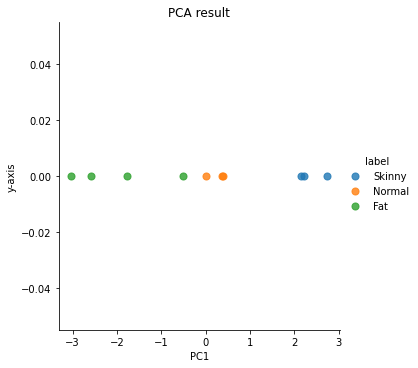

In [50]:
sns.lmplot('PC1', 'y-axis', data=result, fit_reg=False, scatter_kws={"s": 50}, hue="label")
plt.title('PCA result')

---

<br>
<br>

# scikit-learn PCA

sckit-learn에서 제공하는 메서드를 사용하면 쉽게 PCA 구현이 가능하다!

[sklearn.decomposition.PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) : Principal component analysis (PCA)

- n_components : 몇 개 차원까지 축소할 것인지
- copy : 원래 배열에 덮어쓸 것인지 (False의 경우 fit_transform을 사용)
- whiten : components_ 벡터에 n_samples 제곱근을 곱하고 고유값으로 나눠져 uncorrelated outputs을 보장한다. 하지만 일부 정보를 소실시킬 수 있다.
- svd_solver : 고유값 분해 시 방정식의 풀이 방법을 지정 (기본값은 auto: shape와 n_components를 기반으로 더 효율적인 randomized 방법, 그렇지 않으면 SVD 사용하는 방법)

In [52]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=1)
sklearn_pca_x = pca.fit_transform(X_std)

Text(0.5, 1.0, 'PCA result by sckit-learn')

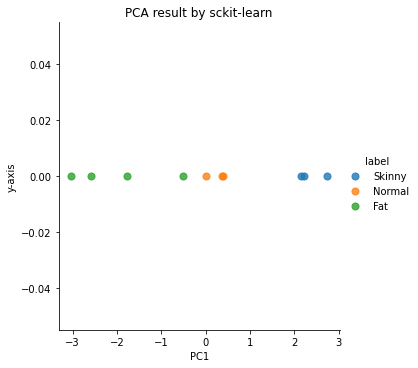

In [55]:
sklearn_result = pd.DataFrame(sklearn_pca_x, columns=['PC1'])
sklearn_result['y-axis'] = 0.0
sklearn_result['label'] = Y

sns.lmplot('PC1', 'y-axis', data=result, fit_reg=False, scatter_kws={"s": 50}, hue="label")
plt.title('PCA result by sckit-learn')

<br>
<br>

---

[참고 영상](https://www.youtube.com/watch?v=DUJ2vwjRQag)